## Support Vector Machine
* Author : Sabari Murugan S
* GitHub : https://github.com/sabarimurugans47
* License: Educational use only. Please credit if reused.

In [522]:
import numpy as np,matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X = np.array([
    [1, 2],
    [2, 3],
    [3, 3],
    [5, 5],
    [6, 6],
    [7, 8]
])
y = np.array([0, 0, 0, 1, 1, 1])

## SupportVectorClassifier : Linear Kernel
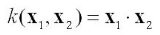

In [523]:
clf=SVC(kernel='linear')
clf.fit(X,y)

SVC(kernel='linear')

In [524]:
clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [525]:
print('accuracy',clf.score(X,y))

accuracy 1.0


## Interpreting Support Vectors

In [526]:
clf.support_vectors_

array([[3., 3.],
       [5., 5.]])

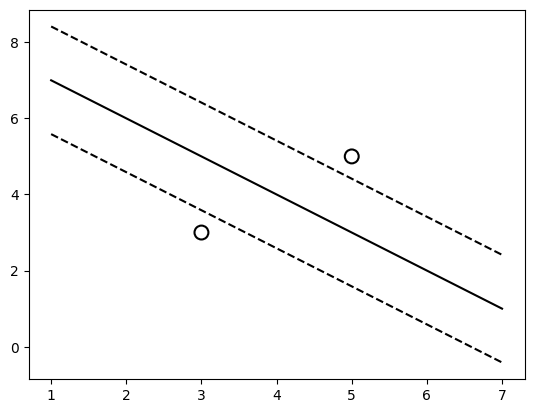

In [527]:
w = clf.coef_[0]
b = clf.intercept_[0]
x_min=X[:,0].min()
x_max=X[:,0].max()
y_min=X[:,1].min()
y_max=X[:,1].max()
margin = 1 / np.linalg.norm(w)
xx_line = np.linspace(x_min, x_max)
yy_decision = -(w[0] * xx_line + b) / w[1]
yy_margin_up = yy_decision + margin
yy_margin_down = yy_decision - margin
plt.plot(xx_line, yy_decision, 'k-')
plt.plot(xx_line, yy_margin_up, 'k--')
plt.plot(xx_line, yy_margin_down, 'k--')
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1],
            s=100, facecolors='none', edgecolors='k', linewidths=1.5)

In [528]:
clf.n_support_,clf.support_vectors_

(array([1, 1], dtype=int32),
 array([[3., 3.],
        [5., 5.]]))

In [529]:
clf.predict([[0.5,-1.0]])

array([0])

In [530]:
clf.coef_,clf.intercept_

(array([[0.5, 0.5]]), array([-4.]))

## sample computation

In [531]:
new_x1=5
new_x2=3
print(clf.predict([[new_x1,new_x2]]))

[1]


In [532]:
dot_product=np.dot(clf.coef_,[new_x1,new_x2])+clf.intercept_
print(dot_product)

[0.]


## Polynomial Kernel
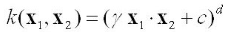
* d - degree
* c - constant(bias)
* γ - Controls the influence of the dot product


In [533]:
X=np.array([[1,2],[2,3],
            [3,3],[5,5],
            [6,6],[7,8],
            [4,4]])
y=np.array([0,0,0,1,1,1,1])

## degree = 2 (Quadratic)

In [534]:
svc=SVC(kernel='poly',degree=2,C=1)
svc.fit(X,y)

SVC(C=1, degree=2, kernel='poly')

In [535]:
svc.get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 2,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

*  C = Controls the margin , how many misclassifications should allow.If C is larger it makes strict line leads to overfitting.
* gamma - Controls the scale of training data points. If gamma value is low , it makes a smoother curve , if large it makes decision curve on data points itself.
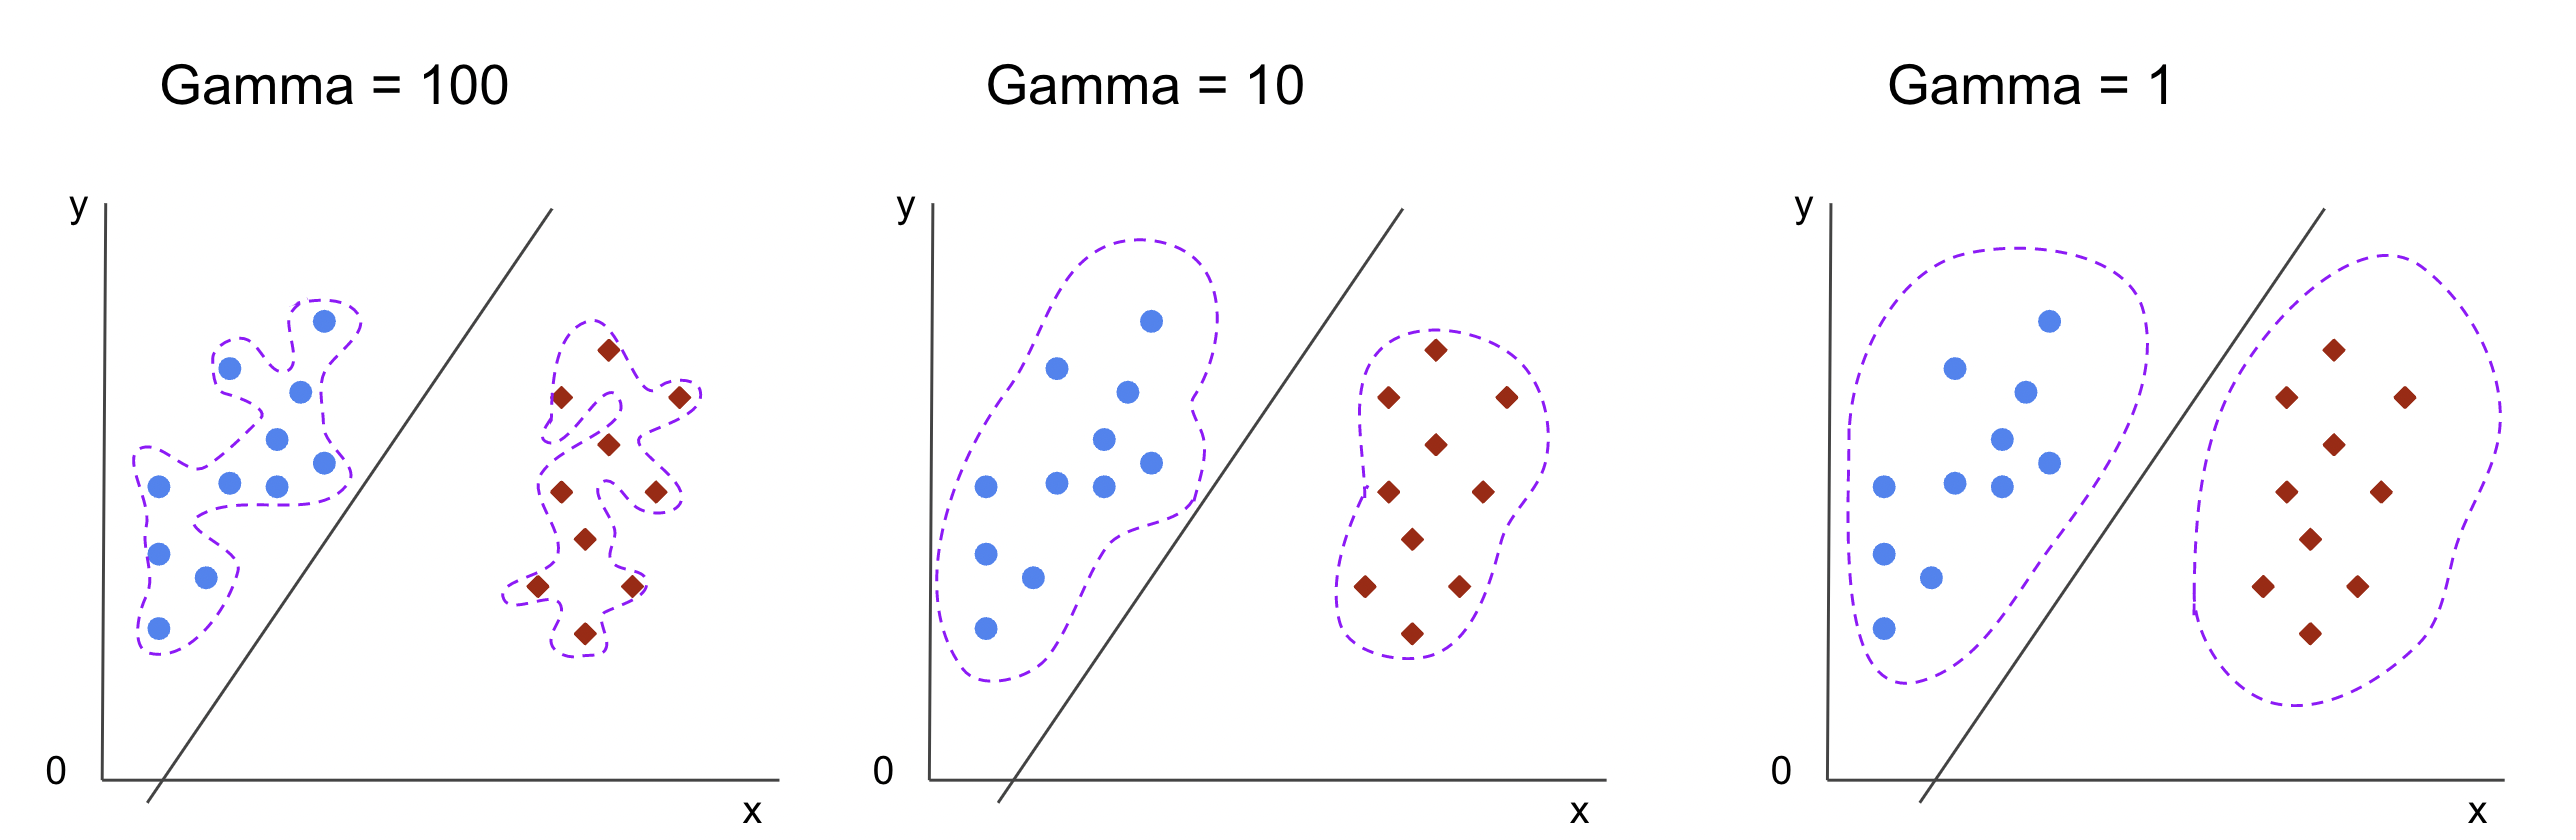

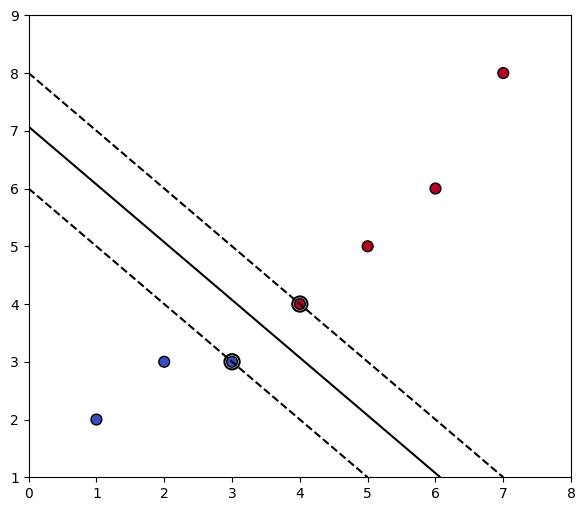

In [536]:
xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-1, X[:,0].max()+1, 500),
    np.linspace(X[:,1].min()-1, X[:,1].max()+1, 500)
)
grid = np.c_[xx.ravel(), yy.ravel()]
Z = svc.decision_function(grid).reshape(xx.shape)
plt.figure(figsize=(7, 6))
plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=60, edgecolors='k')
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1],
            s=120, facecolors='none', edgecolors='black', linewidths=1.5, label='Support Vectors')
plt.show()

In [537]:
svc.support_vectors_,svc.n_support_

(array([[3., 3.],
        [4., 4.]]),
 array([1, 1], dtype=int32))

In [538]:
svc.predict([[4.5,2.5]])

array([0])

In [539]:
print('accuracy',svc.score(X,y))

accuracy 1.0


## Radial Basis Kernel (rbf)
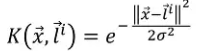
* Convert features into infinite dimensional space to fit a decision boundary

In [540]:
#Example computation
X=np.array([1.0, 2.0]).reshape(-1, 1)
y=[2,3]

In [541]:
#Compute euclidean distance
z=np.sqrt((1-2)**2+(2-3)**2)
z

np.float64(1.4142135623730951)

In [542]:
std_x=np.std(y)

In [543]:
z**2

np.float64(2.0000000000000004)

In [544]:
np.exp(-(2/2))

np.float64(0.36787944117144233)

In [545]:
svc=SVC(kernel='rbf')
svc.fit(X,y)

SVC()

In [546]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [547]:
X = np.array([
    [1, 2],
    [2, 1],
    [2, 3],
    [3, 2],
    [6, 5],
    [7, 6],
    [8, 7],
    [7, 8]
])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])
svc = SVC(kernel='rbf', gamma=0.01, C=8)
svc.fit(X, y)

SVC(C=8, gamma=0.01)

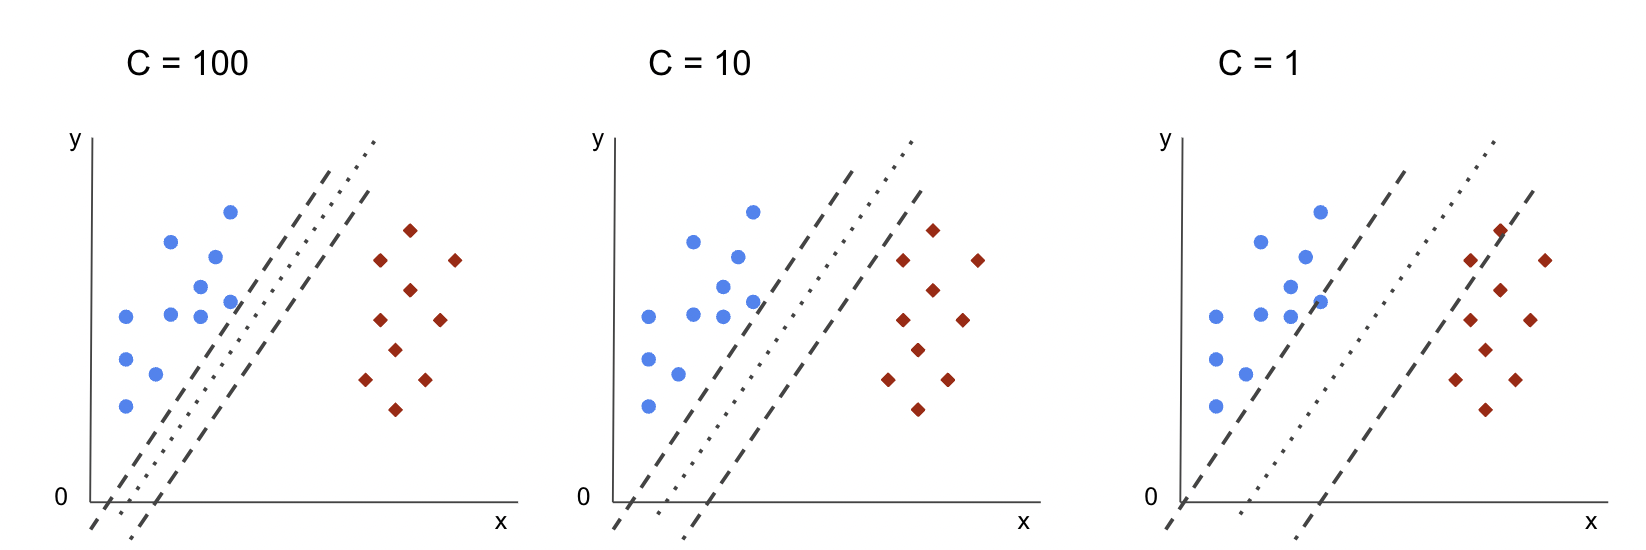

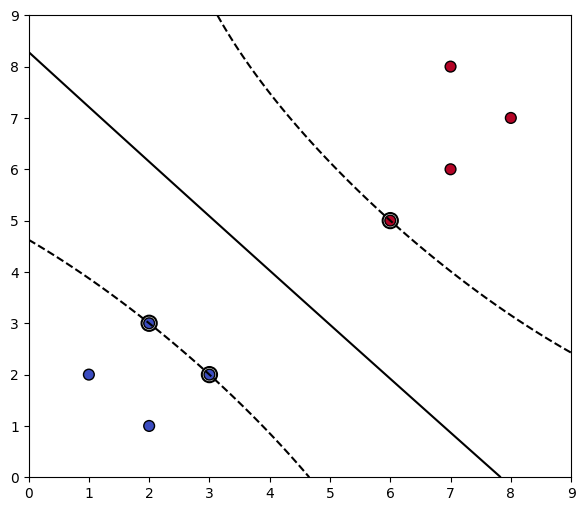

In [548]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = svc.decision_function(grid).reshape(xx.shape)

# Plot
plt.figure(figsize=(7, 6))
plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=60, edgecolors='k')
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1],
            s=120, facecolors='none', edgecolors='black', linewidths=1.5, label='Support Vectors')
plt.show()

In [549]:
svc.score(X,y)

1.0

In [550]:
svc.predict([[4,5]])

array([1])

In [551]:
svc.support_vectors_

array([[2., 3.],
       [3., 2.],
       [6., 5.]])

## SupportVectorRegressor

In [552]:
age = np.array([18, 22, 25, 30, 35, 40, 45, 50, 55, 60]).reshape(-1, 1)
weight = np.array([86, 48, 72, 58, 78, 62, 88, 80, 86, 102])  # continuous target

In [553]:
from sklearn.svm import SVR
svr=SVR(kernel='linear',C=10,epsilon=10)
svr.fit(age,weight)

SVR(C=10, epsilon=10, kernel='linear')

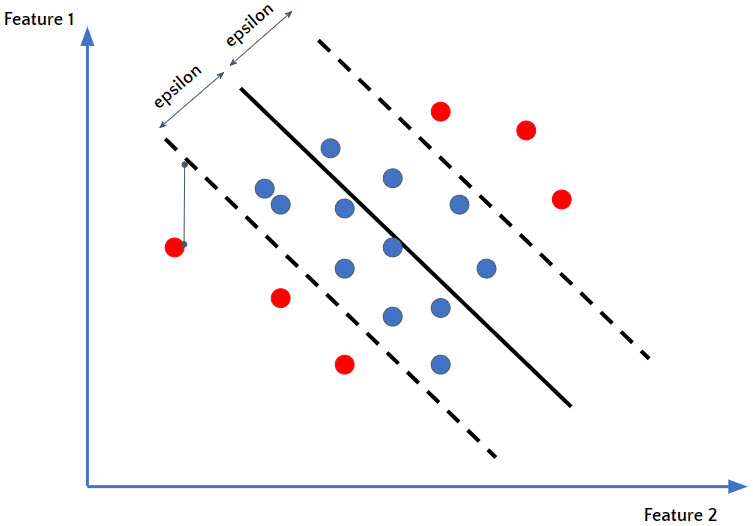

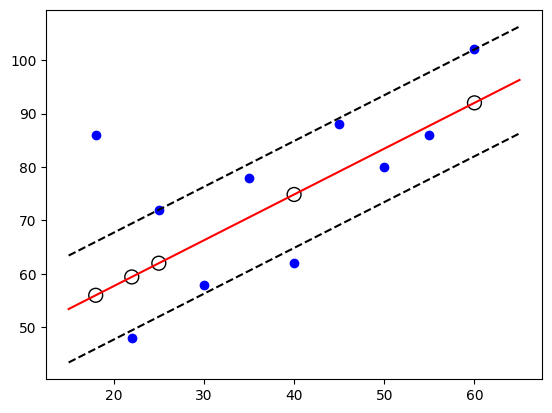

In [554]:
age_range = np.linspace(15, 65, 200).reshape(-1, 1)
pred = svr.predict(age_range)

# Calculate margins
coef = svr.coef_[0][0]
intercept = svr.intercept_[0]
epsilon = svr.epsilon
upper = coef * age_range + intercept + epsilon
lower = coef * age_range + intercept - epsilon

# Plot
plt.scatter(age, weight, color='blue', label='Data')
plt.plot(age_range, pred, color='red', label='SVR line')
plt.plot(age_range, upper, 'k--', label='Margin (+ε)')
plt.plot(age_range, lower, 'k--', label='Margin (-ε)')
plt.scatter(svr.support_vectors_, svr.predict(svr.support_vectors_),
            s=100, facecolors='none', edgecolors='black', label='Support Vectors')
plt.show()

## In svr , we want to make most datapoints to fall under margin by increasing epsilon value.



---

